Import numpy and pandas.

In [1]:
import pandas as pd
import numpy as np
import os

Using the bash magic command, view the list of files inside of the data directory.

In [2]:
%ls data

ActiveFile-Wilm1thru8-20191015.csv
DE-VoterFile-Documentation 20171010.pdf


Load the csv file into a Pandas DataFrame.

In [4]:
 df = pd.read_csv('data/ActiveFile-Wilm1thru8-20191015.csv')

Display a list of columns in the DataFrame.

In [5]:
df.columns

Index(['UNIQUE-ID', 'LAST-NAME', 'FIRST-NAME', 'MID-INIT', 'SUFFIX',
       'YEAR-OF-BIRTH', 'HOME-NO', 'HOME-APT', 'HOME-STREET', 'HOME-DEV',
       'HOME-CITY', 'HOME-ZIPCODE', 'COUNTY', 'ED', 'RD', 'SD', 'CNLEVY',
       'WILM', 'CODE-HOME-CITY', 'SCH-DIST', 'PARTY', 'DATE-REG', 'PP-HIST-1',
       'PP-HIST-2', 'PR-HIST-1', 'PR-HIST-2', 'PR-HIST-3', 'GEN-HIST-1',
       'GEN-HIST-2', 'GEN-HIST-3', 'GEN-HIST-4', 'GEN-HIST-5', 'SP-HIST-1',
       'SP-HIST-2', 'SP-HIST-3', 'SCHL-HIST-1', 'SCHL-HIST-2', 'SCHL-HIST-3',
       'SCHL-HIST-4', 'SCHL-HIST-5', 'REF-HIST-1', 'REF-HIST-2', 'REF-HIST-3',
       'REF-HIST-4', 'REF-HIST-5', 'MAIL-NO', 'MAIL-APT', 'MAIL-STR',
       'MAIL-CITY', 'MAIL-STATE', 'MAIL-ZIP', 'DATE-LAST-CHG', 'CODE-CHANGE',
       'STATUS'],
      dtype='object')

What is the shape of this DataFrame? How many columns does each row have? How many rows are there?

In [6]:
df.shape

(51909, 54)

In [7]:
df.shape[0]  #rows

51909

In [8]:
df.shape[1]  #columns

54

In [9]:
df.head()

,UNIQUE-ID,LAST-NAME,FIRST-NAME,MID-INIT,SUFFIX,YEAR-OF-BIRTH,HOME-NO,HOME-APT,HOME-STREET,HOME-DEV,...,REF-HIST-5,MAIL-NO,MAIL-APT,MAIL-STR,MAIL-CITY,MAIL-STATE,MAIL-ZIP,DATE-LAST-CHG,CODE-CHANGE,STATUS
0,100234840,ROY,BEVERLY,A,NaN,1952,320,#912,E 5TH ST,HERLIHY HOUSE APTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180715,CR,A
1,100685572,WILLIAMS,LISA,F,NaN,1968,826,NaN,W 5TH ST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180715,CR,A
2,100485262,HARRIS,JOSEPH,A,III,1963,2616,NaN,W 18TH ST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180715,CR,A
3,100349191,LAMBORN,GERALD,V,NaN,1958,706,NaN,W 34TH ST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190805,CR,A
4,100394887,KRYSTOPOLSKI,ANDREW,R,NaN,1981,1009,NaN,ANCHORAGE ST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180715,CR,A


# HOME ZIP CODE

Group objects using the HOME-ZIPCODE column. Assign the value to a variable called grouped_zc.  
[Pandas Groupby User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [10]:
grouped_zc = df.groupby('HOME-ZIPCODE')

What type of object is grouped_zc?

In [11]:
type(grouped_zc) 

pandas.core.groupby.generic.DataFrameGroupBy

DataFrameGroupBy objects contain a groups attribute. Display the value of the groups attribute belonging to the grouped_zc object.

In [12]:
grouped_zc

Invoke the size method on the grouped_zc object to find out how many items are associated with each zip code.

In [13]:
grouped_zc.size()

HOME-ZIPCODE
19801    10730
19802    17182
19805    15548
19806     8326
19807      123
dtype: int64

Use a magic command so that matplotlib graphics will display inline.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

Create a pie chart illustrating the number of voters per zip code.

Text(0.5, 1.0, 'VOTERS PER ZIPCODE')

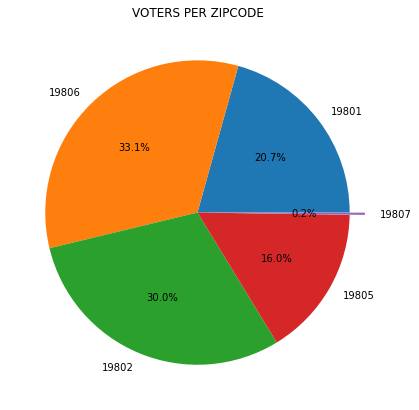

In [15]:
labels = df['HOME-ZIPCODE'].unique()
explode = [0, 0, 0, 0.0, 0.1]
plt.figure(figsize=(7, 7))
plt.pie(grouped_zc.size(), labels=labels, explode= explode, autopct='%1.1f%%')
plt.title('VOTERS PER ZIPCODE')

# YEAR OF BIRTH

Group objects by the YEAR-OF-BIRTH column. Assign the value to an object called "grouped_yob".

In [16]:
grouped_yob = df.groupby('YEAR-OF-BIRTH') 

Display the value of the groups attribute belonging the grouped_yob object.

In [17]:
grouped_yob

Select the object for the row indicating that the voter was born in 1900.

In [18]:
df[df['YEAR-OF-BIRTH'] == 1900]

,UNIQUE-ID,LAST-NAME,FIRST-NAME,MID-INIT,SUFFIX,YEAR-OF-BIRTH,HOME-NO,HOME-APT,HOME-STREET,HOME-DEV,...,REF-HIST-5,MAIL-NO,MAIL-APT,MAIL-STR,MAIL-CITY,MAIL-STATE,MAIL-ZIP,DATE-LAST-CHG,CODE-CHANGE,STATUS
49249,101092654,KENNEDY,JORDAN,D,NaN,1900,724,NaN,N BANCROFT PKY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170731,P6,I


Graph a histogram to  illustrate the age distribution of voters in this dataset. Ty using different values for the bins attribute of the histogram. 

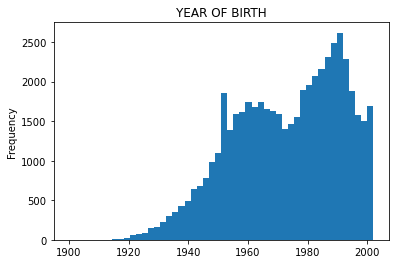

In [19]:
df['YEAR-OF-BIRTH'].plot.hist(bins=50, title = 'YEAR OF BIRTH')
# plt.title('YEAR OF BIRTH')

# PARTY

Group objects using the PARTY column. Assign the value to a variable called grouped_p.

In [20]:
grouped_p = df.groupby('PARTY') 

Display the value of the groups attribute belonging to the grouped_p object.

In [21]:
grouped_p

Invoke the size method on the grouped_p object to find out how many items are associated with each party.

In [22]:
grouped_p.size()

PARTY
A       52
B      441
D    38020
E       30
G       42
H       82
I     7670
J      161
L       98
M        1
O       33
Q       17
R     4851
T       14
V       11
W      333
Y       14
Z       39
dtype: int64

Create a bar chart to visualize the number of voters associated with each party.

In [23]:
df['PARTY']

0        I
1        D
2        R
3        D
4        D
        ..
51904    D
51905    D
51906    D
51907    D
51908    I
Name: PARTY, Length: 51909, dtype: object

<BarContainer object of 18 artists>

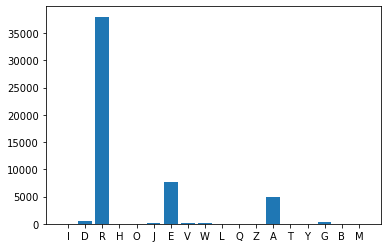

In [27]:
plt.bar( df.PARTY.unique(),  grouped_p.size())

# Merging Two DataFrames

Using the data from the documentation, create a Pandas DataFrame that contains the party code and the corresponding legal name for each party.

In [90]:
legal_names = { 'A' : 'AMERICAN ',
               'B' : 'AMERICAN DELTA',
               'D' : 'DEMOCRATIC PARTY',
               'E' : 'LIBERAL',
               'G' : 'NON PARTISAN',
               'H' : 'GREEN PARTY',
               'I' : 'UNAFFILIATED',
               'J' : 'WORKING FAMILIES PARTY',
               'L' : 'LIBERTARIAN PARTY',
               'M' : 'REFORM PARTY',
               'O' : 'OTHERS/ALL OTHER PARTIES',
               'Q' : 'CONSTITUTION PARTY',
               'R' : 'REPUBLICAN PARTY',
               'T' : 'CONSERVATIVE',
               'V' : 'NATURAL LAW PARTY',
               'W' : 'INDEPENDENT PARTY OF DEL',
               'Y' : 'THE BLUE ENIGMA PARTY',
               'Z' : 'SOCIALIST WORKERS PARTY'}

In [91]:
df_legal_names = pd.DataFrame(legal_names.items())
df_legal_names.columns = ['PARTY', 'LEGAL NAME']
df_legal_names = df_legal_names.set_index('PARTY')

In [92]:
df_legal_names

,LEGAL NAME
PARTY,
A,AMERICAN
B,AMERICAN DELTA
D,DEMOCRATIC PARTY
E,LIBERAL
G,NON PARTISAN
H,GREEN PARTY
I,UNAFFILIATED
J,WORKING FAMILIES PARTY
L,LIBERTARIAN PARTY


Create a Pandas DataFrame that contains the Party code and the corresponding number of registered voters for said party.

In [93]:
# Create DataFrame df_party_counts here 
df_party_counts = pd.DataFrame(grouped_p.size())
df_party_counts.columns = ['VOTERS COUNT']

In [94]:
df_party_counts 

,VOTERS COUNT
PARTY,
A,52
B,441
D,38020
E,30
G,42
H,82
I,7670
J,161
L,98


Merge the two DataFrames.

In [95]:
# Merge DataFrame here 
# merge = pd.concat([df_legal_names, df_party_counts], ignore_index=True)
df_outer = pd.merge(df_legal_names, df_party_counts, on='PARTY', how='outer')


In [96]:
# Display new DataFrame here 
df_outer

,LEGAL NAME,VOTERS COUNT
PARTY,,
A,AMERICAN,52
B,AMERICAN DELTA,441
D,DEMOCRATIC PARTY,38020
E,LIBERAL,30
G,NON PARTISAN,42
H,GREEN PARTY,82
I,UNAFFILIATED,7670
J,WORKING FAMILIES PARTY,161
L,LIBERTARIAN PARTY,98


Create a bar graph again but using the legal name for each party as the value on the x axes.

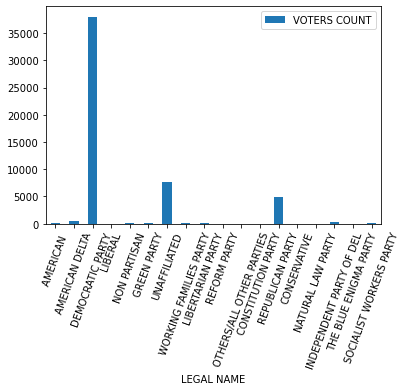

In [107]:
# plt.bar(df_outer['LEGAL NAME'],  df_outer['VOTERS COUNT']) 
df_outer.plot(x = 'LEGAL NAME', y = 'VOTERS COUNT', kind = 'bar', rot =70)